# FINAL PROJECT 2 

```
**************************************
* Nama          : Roikhatul Miskiyah *
* Kode Peserta  : PYTN-KS05-010      *
* Batch         : 5                  *
* Project       : 2                  *
**************************************
```

# Kelompok 4
1. Ari Sandy Kurniawan - PYTN-KS05-005
2. Muhammad Zhafran Bahij - PYTN-KS05-008
3. Roikhatul Miskiyah - PYTN-KS05-010


**Outline:**
```
A. Perkenalan
B. Pustaka yang Dibutuhkan
C. Data Loading 
D. Data Cleaning
E. Eksplorasi Data
F. Data Preprocessing
G. Pendefinisian Model
H. Pelatihan Model
I. Evaluasi Model
J. Model Inference
K. Kesimpulan 
```

## A. Perkenalan

1. Latar belakang

Hujan merupakan bagian penting dari kehidupan kita. Awan memberikan hadiah hujan kepada manusia. Dalam rpoject ini kita mencoba meramalkan kapan akan 
turun hujan. Jadi, kita mencoba untuk memprediksi apakah akan hujan di Australia besok atau tidak. 

2. Data yang digunakan

Dataset yang digunakan adalah database besar yang berisi 145460 nilai dan 23 kolom, di sini kita akan menggunakan database "weatherAUS.csv" yang tersedia untuk digunakan https://www.kaggle.com/jsphyg/weather-dataset-rattle-package. Data tersebut berisi pengamatan cuaca harian selama kurang lebih sepuluh tahun yang dikumpulkan dari berbagai stasiun cuaca Australia.
RainTomorrow adalah variabel yang diprediksi (Y).

3. Objective yang ingin dicapai

Dalam penelitian ini kami memprediksi apakah akan turun hujan keesokan harinya di Australia menggunakan metode Logistic Regression dan Support Vector Machine (SVM). Kekhususan dataset yang dianalisis adalah data yang tidak seimbang, karena di wilayah geografis, yakni wilayah Australia hujan agak jarang terjadi. Dari data yang tidak seimbang tersebut sangat mempengaruhi kemampuan model untuk memprediksi 'kejadian langka', dalam hal ini untuk memprediksi besok akan hujan atau tidak.

## B. Pustaka yang Dibutuhkan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import plotly.express as px
import folium


from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import svm
import sklearn.metrics as metrics

from time import time
from six import StringIO
from sklearn import tree
import sklearn.tree as tree
from IPython.display import Image
import pydotplus
import joblib
import pickle

## C. Data Loading 

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
weatherAUS = '/content/drive/My Drive/FP2/weatherAUS.csv'

In [4]:
df = pd.read_csv(weatherAUS)
df.head(5)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


## D. Data Cleaning

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [6]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


Dari hasil deksripsi di atas dapat dilihat beberapa hal penting, seperti suhu sedang di Australia (12 hingga 23 derajat), kita juga dapat melihat bahwa suhu dapat mencapai tingkat yang sangat tinggi.

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MinTemp,143975.0,12.194034,6.398495,-8.5,7.6,12.0,16.9,33.9
MaxTemp,144199.0,23.221348,7.119049,-4.8,17.9,22.6,28.2,48.1
Rainfall,142199.0,2.360918,8.478060,0.0,0.0,0.0,0.8,371.0
Evaporation,82670.0,5.468232,4.193704,0.0,2.6,4.8,7.4,145.0
Sunshine,75625.0,7.611178,3.785483,0.0,4.8,8.4,10.6,14.5
WindGustSpeed,135197.0,40.035230,13.607062,6.0,31.0,39.0,48.0,135.0
WindSpeed9am,143693.0,14.043426,8.915375,0.0,7.0,13.0,19.0,130.0
WindSpeed3pm,142398.0,18.662657,8.809800,0.0,13.0,19.0,24.0,87.0
Humidity9am,142806.0,68.880831,19.029164,0.0,57.0,70.0,83.0,100.0
Humidity3pm,140953.0,51.539116,20.795902,0.0,37.0,52.0,66.0,100.0


In [8]:
df.shape

(145460, 23)

In [9]:
df.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

Hasil di atas menunjukkan bahwa terdapat missing value yang begitu banyak dibandingkan dengan data yang tidak memiliki missing values.

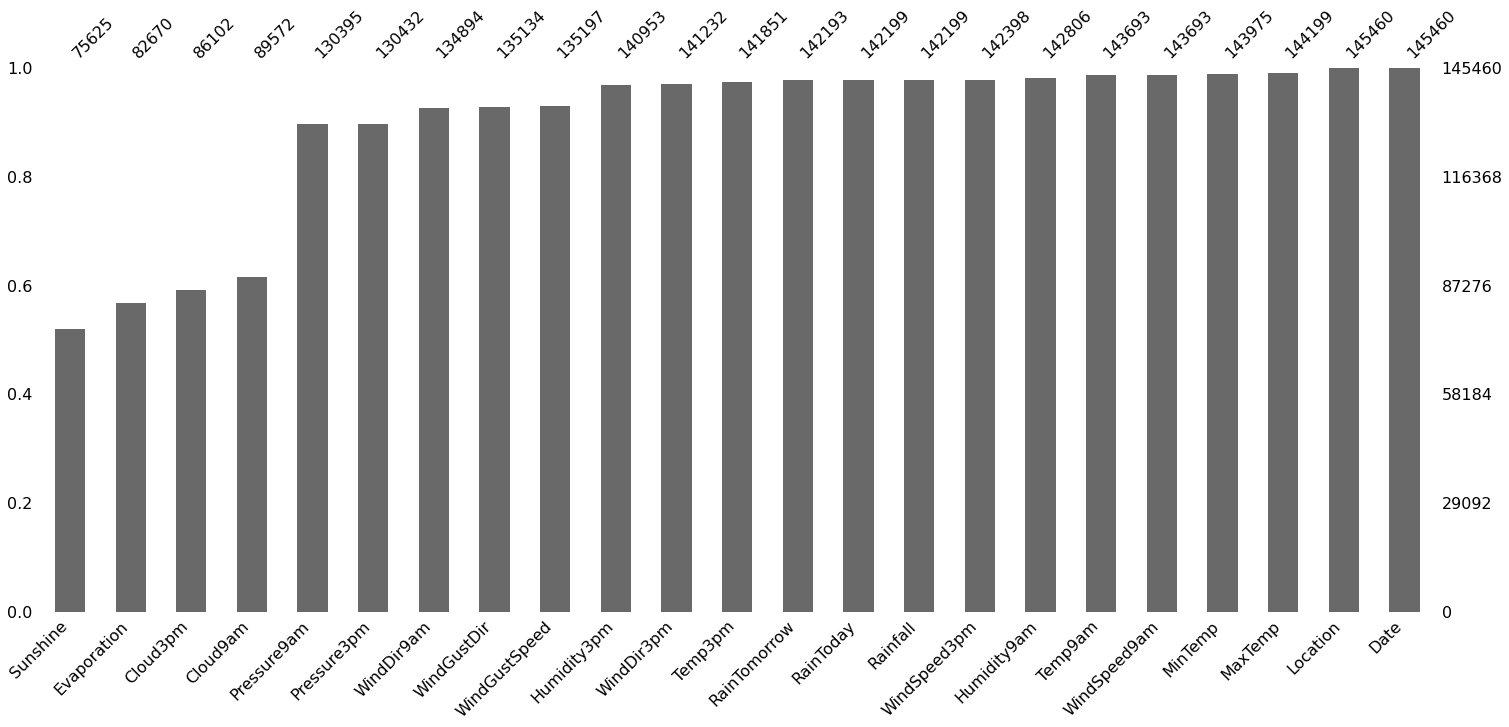

In [10]:
msno.bar(df, sort='ascending')

Di sini kita mengisi variabel kontinu yang memiliki nilai nol dengan mean.

In [11]:
df['MinTemp']=df['MinTemp'].fillna(df['MinTemp'].mean())
df['MaxTemp']=df['MaxTemp'].fillna(df['MaxTemp'].mean())
df['Rainfall']=df['Rainfall'].fillna(df['Rainfall'].mean())
df['Evaporation']=df['Evaporation'].fillna(df['Evaporation'].mean())
df['Sunshine']=df['Sunshine'].fillna(df['Sunshine'].mean())
df['WindGustSpeed']=df['WindGustSpeed'].fillna(df['WindGustSpeed'].mean())
df['WindSpeed9am']=df['WindSpeed9am'].fillna(df['WindSpeed9am'].mean())
df['WindSpeed3pm']=df['WindSpeed3pm'].fillna(df['WindSpeed3pm'].mean())
df['Humidity9am']=df['Humidity9am'].fillna(df['Humidity9am'].mean())
df['Humidity3pm']=df['Humidity3pm'].fillna(df['Humidity3pm'].mean())
df['Pressure9am']=df['Pressure9am'].fillna(df['Pressure9am'].mean())
df['Pressure3pm']=df['Pressure3pm'].fillna(df['Pressure3pm'].mean())
df['Cloud9am']=df['Cloud9am'].fillna(df['Cloud9am'].mean())
df['Cloud3pm']=df['Cloud3pm'].fillna(df['Cloud3pm'].mean())
df['Temp9am']=df['Temp9am'].fillna(df['Temp9am'].mean())
df['Temp3pm']=df['Temp3pm'].fillna(df['Temp3pm'].mean())

Kemudian kita mengisi variabel categoricals yang memiliki nilai null dengan mode.

In [12]:
df['RainToday']=df['RainToday'].fillna(df['RainToday'].mode()[0])
df['RainTomorrow']=df['RainTomorrow'].fillna(df['RainTomorrow'].mode()[0])
df['WindDir9am'] = df['WindDir9am'].fillna(df['WindDir9am'].mode()[0])
df['WindGustDir'] = df['WindGustDir'].fillna(df['WindGustDir'].mode()[0])
df['WindDir3pm'] = df['WindDir3pm'].fillna(df['WindDir3pm'].mode()[0])

In [13]:
df.isnull().sum().sum()

0

In [14]:
df.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

Memverifikasi duplikasi dari dataset

In [15]:
dup = df.duplicated()
print(dup)

0         False
1         False
2         False
3         False
4         False
          ...  
145455    False
145456    False
145457    False
145458    False
145459    False
Length: 145460, dtype: bool


In [16]:
print(dup.any())

False


Hasil di atas menunjukkan bahwa tidak terdapat duplikasi data.

## E. Eksplorasi Data

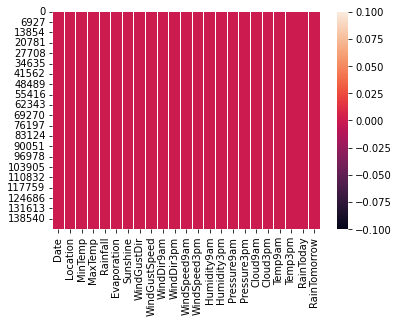

In [17]:
sns.heatmap(df.isnull());

Kemudian memverifikasi variabel target, di sini kita dapat melihat hitungan jika kita memiliki lebih banyak hujan.

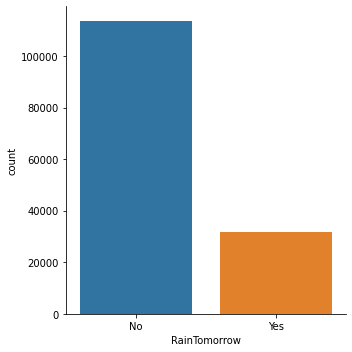

In [18]:
sns.catplot(x = 'RainTomorrow', kind = 'count', data = df)

In [19]:
df['RainTomorrow'].value_counts()

No     113583
Yes     31877
Name: RainTomorrow, dtype: int64

Memverifikasi korelasi antara variabel

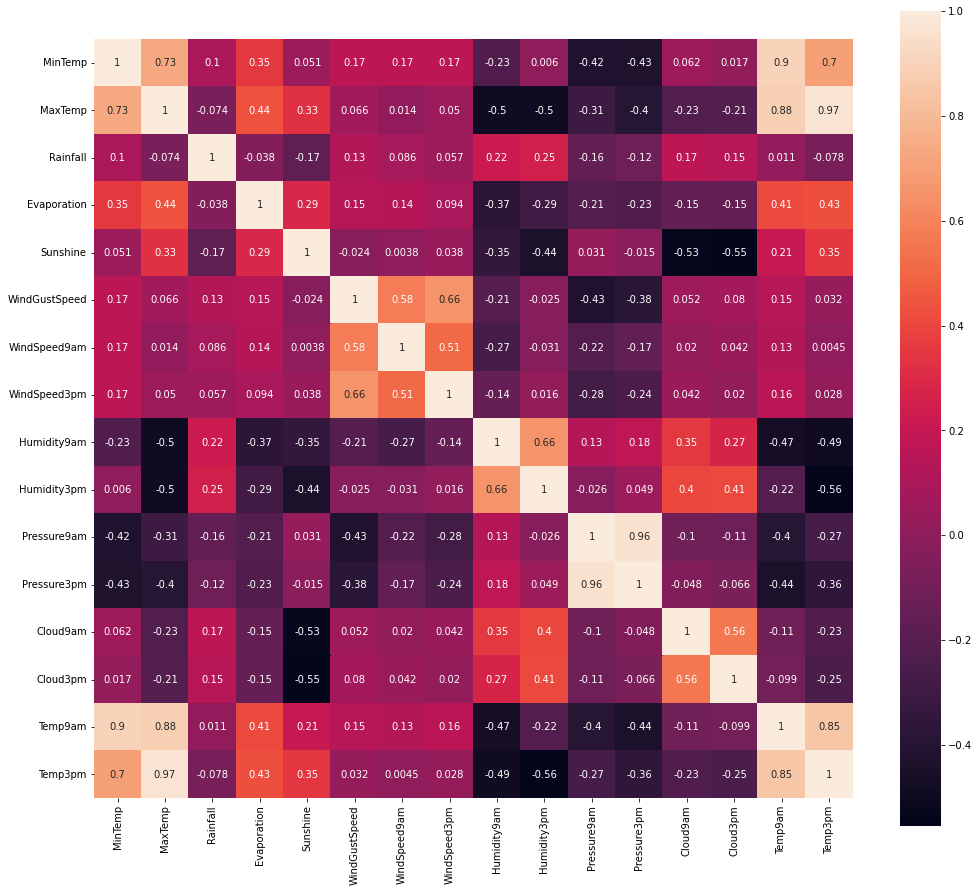

In [20]:
plt.figure(figsize=(17,15))
correlacao = sns.heatmap(df.corr(), square=True, annot=True)
correlacao.set_xticklabels(correlacao.get_xticklabels(), rotation=90)          
plt.show()

Memverifikasi distribusi variabel MinTemp, di sini kita dapat melihat bahwa rata-rata suhu minimum di Australia adalah antara 8 dan 12 derajat.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


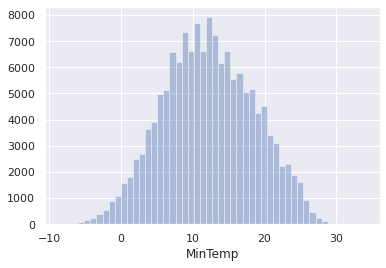

In [21]:
sns.set(color_codes = True)
sns.distplot(df.MinTemp, kde = False)

Memverifikasi distribusi variabel MaxTemp, di sini kita dapat melihat bahwa rata-rata suhu maksimum di Australia adalah antara 20 dan 23 derajat.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


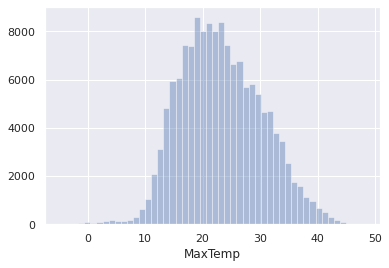

In [22]:
sns.set(color_codes = True)
sns.distplot(df.MaxTemp, kde = False)

Memeriksa korelasi variabel MaxTemp dan MinTemp, kita dapat melihat bahwa ketika data memiliki suhu tinggi, hasilnya lebih umum tidak hujan di hari berikutnya.

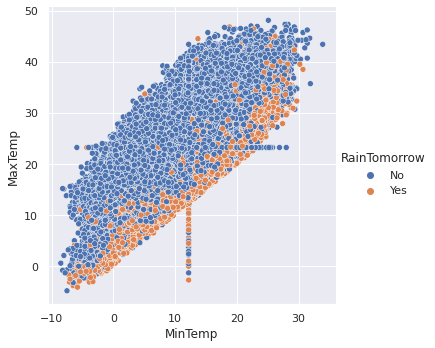

In [23]:
sns.relplot(x='MinTemp', y = 'MaxTemp', hue = "RainTomorrow", data = df)

Memeriksa korelasi variabel MaxTemp dan Sunshine, kita dapat melihat bahwa ketika data memiliki suhu tinggi di Sunshine, lebih umum tidak hujan di hari berikutnya.

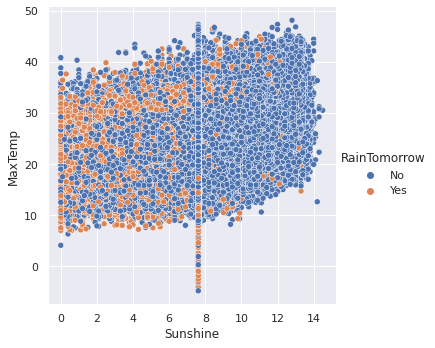

In [24]:
sns.relplot(x='Sunshine', y = 'MaxTemp', hue = "RainTomorrow", data = df)

Memeriksa korelasi variabel RainTomorrow dan MinTemp, kita dapat melihat bahwa data memiliki sedikit perbedaan antara MinTemp dan akankah hujan turun pada hari berikutnya.

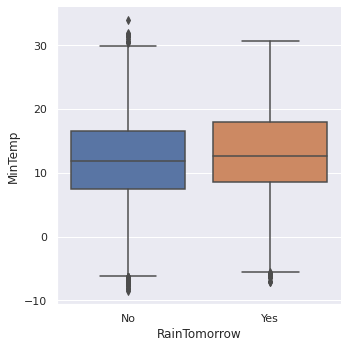

In [25]:
sns.catplot(x = 'RainTomorrow', y="MinTemp", kind="box", data = df)

Memeriksa korelasi variabel RainTomorrow dan MaxTemp, kita dapat melihat bahwa data memiliki sedikit perbedaan ketika memiliki suhu yang lebih tinggi, itu mempengaruhi apakah akan hujan di hari berikutnya atau tidak.

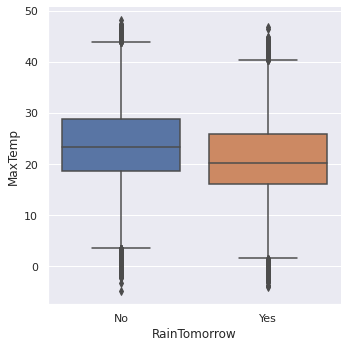

In [26]:
sns.catplot(x = 'RainTomorrow', y="MaxTemp", kind="box", data = df)

## F. Data Preprocessing


Memeriksa kolerasi dari fitur yang berkaitan dengan rain tomorrow

In [27]:
# Fitur yang merupakan variabel categorical
vab_categori = ['RainToday', 'RainTomorrow', 'WindDir9am', 'WindGustDir', 'WindDir3pm']

In [28]:
df_categori = df[vab_categori]
df_categori.head()

,RainToday,RainTomorrow,WindDir9am,WindGustDir,WindDir3pm
0,No,No,W,W,WNW
1,No,No,NNW,WNW,WSW
2,No,No,W,WSW,WSW
3,No,No,SE,NE,E
4,No,No,ENE,W,NW


In [29]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

df_cat_encode= df_categori.copy()
for col in df_cat_encode.select_dtypes(include='O').columns:
    df_cat_encode[col]=le.fit_transform(df_cat_encode[col])

df_cat_encode

,RainToday,RainTomorrow,WindDir9am,WindGustDir,WindDir3pm
0,0,0,13,13,14
1,0,0,6,14,15
2,0,0,13,15,15
3,0,0,9,4,0
4,0,0,1,13,7
...,...,...,...,...,...
145455,0,0,9,0,1
145456,0,0,9,6,3
145457,0,0,9,3,14
145458,0,0,10,9,3


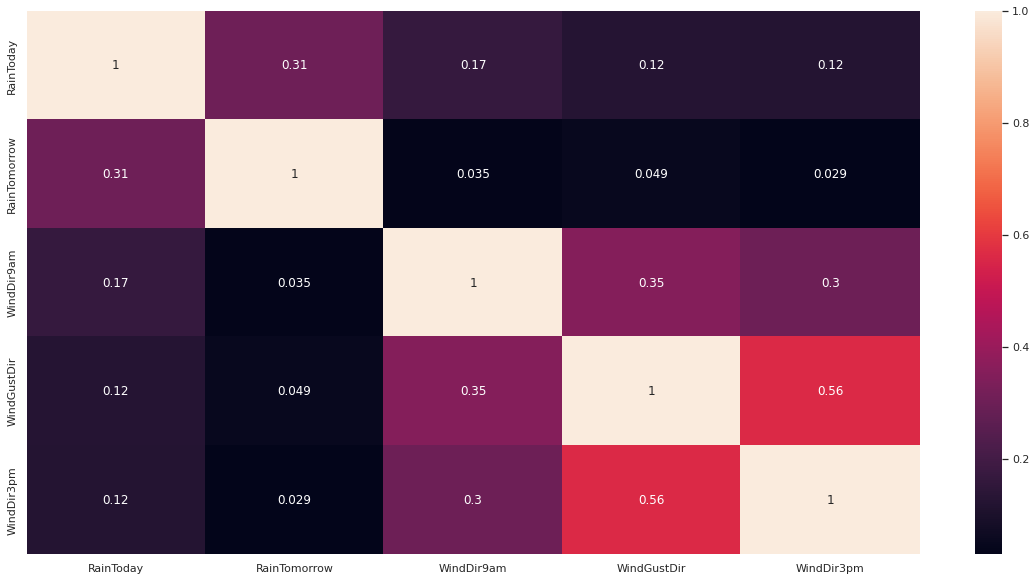

In [30]:
plt.figure(figsize=(20,10))
sns.heatmap(df_cat_encode.corr(),annot=True)

In [31]:
# Fitur yang merupakan variabel kontinu
vab_continu = ['Temp9am', 'Cloud9am', 'Pressure9am', 'Humidity9am', 'WindSpeed3pm', 'WindSpeed9am', 'Sunshine', 'Rainfall', 'MinTemp', 'RainTomorrow']

In [32]:
df_continu = df[vab_continu]
df_continu.head()

,Temp9am,Cloud9am,Pressure9am,Humidity9am,WindSpeed3pm,WindSpeed9am,Sunshine,Rainfall,MinTemp,RainTomorrow
0,16.9,8.000000,1007.7,71.0,24.0,20.0,7.611178,0.6,13.4,No
1,17.2,4.447461,1010.6,44.0,22.0,4.0,7.611178,0.0,7.4,No
2,21.0,4.447461,1007.6,38.0,26.0,19.0,7.611178,0.0,12.9,No
3,18.1,4.447461,1017.6,45.0,9.0,11.0,7.611178,0.0,9.2,No
4,17.8,7.000000,1010.8,82.0,20.0,7.0,7.611178,1.0,17.5,No


In [33]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

df_con_encode= df_continu.copy()
for col in df_con_encode.select_dtypes(include='O').columns:
    df_con_encode[col]=le.fit_transform(df_con_encode[col])

df_con_encode

,Temp9am,Cloud9am,Pressure9am,Humidity9am,WindSpeed3pm,WindSpeed9am,Sunshine,Rainfall,MinTemp,RainTomorrow
0,16.9,8.000000,1007.7,71.0,24.0,20.0,7.611178,0.6,13.4,0
1,17.2,4.447461,1010.6,44.0,22.0,4.0,7.611178,0.0,7.4,0
2,21.0,4.447461,1007.6,38.0,26.0,19.0,7.611178,0.0,12.9,0
3,18.1,4.447461,1017.6,45.0,9.0,11.0,7.611178,0.0,9.2,0
4,17.8,7.000000,1010.8,82.0,20.0,7.0,7.611178,1.0,17.5,0
...,...,...,...,...,...,...,...,...,...,...
145455,10.1,4.447461,1024.6,51.0,11.0,13.0,7.611178,0.0,2.8,0
145456,10.9,4.447461,1023.5,56.0,9.0,13.0,7.611178,0.0,3.6,0
145457,12.5,4.447461,1021.0,53.0,9.0,9.0,7.611178,0.0,5.4,0
145458,15.1,3.000000,1019.4,51.0,7.0,13.0,7.611178,0.0,7.8,0


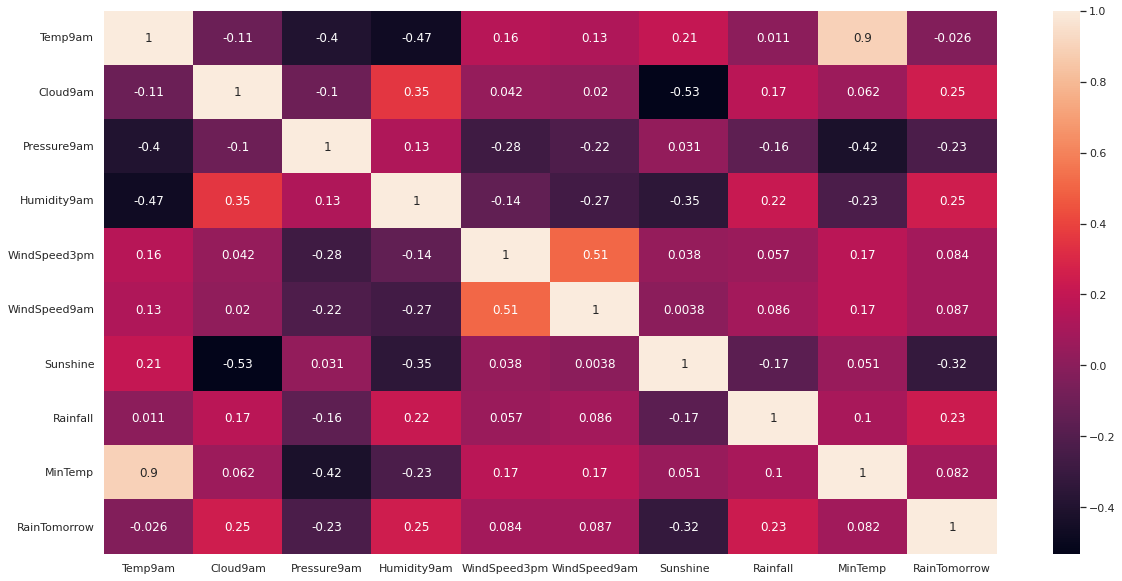

In [34]:
plt.figure(figsize=(20,10))
sns.heatmap(df_con_encode.corr(),annot=True)

In [35]:
# Membuat dataframe baru yang berisikan fitur yang berkaitan dengan RainTomorrow
new_df = df.drop(['Temp9am', 'WindDir9am', 'WindGustDir', 'WindDir3pm'], axis=1)

In [36]:
new_df.shape

(145460, 19)

In [37]:
new_df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm',
       'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am',
       'Cloud3pm', 'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

Format Date: 2008-12-01

In [38]:
numeric_cols = new_df.select_dtypes(include = np.number).columns.to_list()
print(numeric_cols)

['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp3pm']


In [39]:
#Fetching categorical or string columns from the dataset
categorical_cols = new_df.select_dtypes('object').columns.to_list()
print(categorical_cols)

['Date', 'Location', 'RainToday', 'RainTomorrow']


In [40]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = "mean").fit(new_df[numeric_cols])

In [41]:
#apply the mean imputing strategy on numerical columns of raw_df
new_df[numeric_cols] = imputer.transform(new_df[numeric_cols])

In [42]:
new_df[numeric_cols].isna().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp3pm          0
dtype: int64

In [43]:
new_df[categorical_cols].isna().sum()

Date            0
Location        0
RainToday       0
RainTomorrow    0
dtype: int64

In [44]:
new_df[categorical_cols] = new_df[categorical_cols].fillna("unknown")

In [45]:
new_df[categorical_cols].isna().sum()

Date            0
Location        0
RainToday       0
RainTomorrow    0
dtype: int64

In [46]:
new_df["year"] = pd.to_datetime(new_df.Date).dt.year;
new_df["month"] = pd.to_datetime(new_df.Date).dt.month;
new_df["day"] = pd.to_datetime(new_df.Date).dt.day;

In [47]:
print(new_df)

              Date Location  MinTemp    MaxTemp  Rainfall  Evaporation  \
0       2008-12-01   Albury     13.4  22.900000       0.6     5.468232   
1       2008-12-02   Albury      7.4  25.100000       0.0     5.468232   
2       2008-12-03   Albury     12.9  25.700000       0.0     5.468232   
3       2008-12-04   Albury      9.2  28.000000       0.0     5.468232   
4       2008-12-05   Albury     17.5  32.300000       1.0     5.468232   
...            ...      ...      ...        ...       ...          ...   
145455  2017-06-21    Uluru      2.8  23.400000       0.0     5.468232   
145456  2017-06-22    Uluru      3.6  25.300000       0.0     5.468232   
145457  2017-06-23    Uluru      5.4  26.900000       0.0     5.468232   
145458  2017-06-24    Uluru      7.8  27.000000       0.0     5.468232   
145459  2017-06-25    Uluru     14.9  23.221348       0.0     5.468232   

        Sunshine  WindGustSpeed  WindSpeed9am  WindSpeed3pm  ...  Pressure9am  \
0       7.611178       44.0000

In [48]:
new_df_fix = new_df.drop(['Date'], axis=1)

In [49]:
new_df_fix.columns

Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp3pm', 'RainToday', 'RainTomorrow', 'year', 'month', 'day'],
      dtype='object')

In [50]:
# Encoding new data frame
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

new_df_fix_encode= new_df_fix.copy()
for col in new_df_fix_encode.select_dtypes(include='O').columns:
    new_df_fix_encode[col]=le.fit_transform(new_df_fix_encode[col])

new_df_fix_encode

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,...,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp3pm,RainToday,RainTomorrow,year,month,day
0,2,13.4,22.900000,0.6,5.468232,7.611178,44.00000,20.0,24.0,71.0,...,1007.7,1007.1,8.000000,4.50993,21.8,0,0,2008,12,1
1,2,7.4,25.100000,0.0,5.468232,7.611178,44.00000,4.0,22.0,44.0,...,1010.6,1007.8,4.447461,4.50993,24.3,0,0,2008,12,2
2,2,12.9,25.700000,0.0,5.468232,7.611178,46.00000,19.0,26.0,38.0,...,1007.6,1008.7,4.447461,2.00000,23.2,0,0,2008,12,3
3,2,9.2,28.000000,0.0,5.468232,7.611178,24.00000,11.0,9.0,45.0,...,1017.6,1012.8,4.447461,4.50993,26.5,0,0,2008,12,4
4,2,17.5,32.300000,1.0,5.468232,7.611178,41.00000,7.0,20.0,82.0,...,1010.8,1006.0,7.000000,8.00000,29.7,0,0,2008,12,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,41,2.8,23.400000,0.0,5.468232,7.611178,31.00000,13.0,11.0,51.0,...,1024.6,1020.3,4.447461,4.50993,22.4,0,0,2017,6,21
145456,41,3.6,25.300000,0.0,5.468232,7.611178,22.00000,13.0,9.0,56.0,...,1023.5,1019.1,4.447461,4.50993,24.5,0,0,2017,6,22
145457,41,5.4,26.900000,0.0,5.468232,7.611178,37.00000,9.0,9.0,53.0,...,1021.0,1016.8,4.447461,4.50993,26.1,0,0,2017,6,23
145458,41,7.8,27.000000,0.0,5.468232,7.611178,28.00000,13.0,7.0,51.0,...,1019.4,1016.5,3.000000,2.00000,26.0,0,0,2017,6,24


In [51]:
new_df_fix_encode.describe()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,...,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp3pm,RainToday,RainTomorrow,year,month,day
count,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,...,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000
mean,23.793524,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,...,1017.649940,1015.255889,4.447461,4.509930,21.683390,0.219167,0.219146,2012.769751,6.399615,15.712258
std,14.228687,6.365750,7.088124,8.382488,3.161541,2.729486,13.118253,8.861059,8.716581,18.854765,...,6.728467,6.663973,2.265604,2.092954,6.850057,0.413683,0.413669,2.537684,3.427262,8.794789
min,0.000000,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,...,980.500000,977.100000,0.000000,0.000000,-5.400000,0.000000,0.000000,2007.000000,1.000000,1.000000
25%,11.000000,7.700000,18.000000,0.000000,4.000000,7.611178,31.000000,7.000000,13.000000,57.000000,...,1013.500000,1011.100000,3.000000,4.000000,16.700000,0.000000,0.000000,2011.000000,3.000000,8.000000
50%,24.000000,12.100000,22.700000,0.000000,5.468232,7.611178,39.000000,13.000000,18.662657,69.000000,...,1017.649940,1015.255889,4.447461,4.509930,21.400000,0.000000,0.000000,2013.000000,6.000000,16.000000
75%,36.000000,16.800000,28.200000,1.000000,5.468232,8.700000,46.000000,19.000000,24.000000,83.000000,...,1021.800000,1019.400000,6.000000,6.000000,26.200000,0.000000,0.000000,2015.000000,9.000000,23.000000
max,48.000000,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,...,1041.000000,1039.600000,9.000000,9.000000,46.700000,1.000000,1.000000,2017.000000,12.000000,31.000000


In [52]:
# Dataset Split
from sklearn.model_selection import train_test_split
X = new_df_fix_encode.drop(columns=['RainTomorrow'],axis=1).values
y = new_df_fix_encode['RainTomorrow'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [53]:
print(X)

[[2.00000000e+00 1.34000000e+01 2.29000000e+01 ... 2.00800000e+03
  1.20000000e+01 1.00000000e+00]
 [2.00000000e+00 7.40000000e+00 2.51000000e+01 ... 2.00800000e+03
  1.20000000e+01 2.00000000e+00]
 [2.00000000e+00 1.29000000e+01 2.57000000e+01 ... 2.00800000e+03
  1.20000000e+01 3.00000000e+00]
 ...
 [4.10000000e+01 5.40000000e+00 2.69000000e+01 ... 2.01700000e+03
  6.00000000e+00 2.30000000e+01]
 [4.10000000e+01 7.80000000e+00 2.70000000e+01 ... 2.01700000e+03
  6.00000000e+00 2.40000000e+01]
 [4.10000000e+01 1.49000000e+01 2.32213483e+01 ... 2.01700000e+03
  6.00000000e+00 2.50000000e+01]]


In [54]:
print(y)

[0 0 0 ... 0 0 0]


## G. Pendefinisian, Pelatihan, dan Evaluasi Model


### Logistic Regression Model


In [55]:
# Create Model
model = LogisticRegression()
model.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [56]:
y_prediction = model.predict(X_test)
print('Logistic Regression accuracy = ', metrics.accuracy_score(y_test,y_prediction))

Logistic Regression accuracy =  0.8414913607406389


In [57]:
print("y_predicted",y_prediction)
print("y_test",y_test)

y_predicted [0 0 0 ... 0 0 1]
y_test [1 1 0 ... 0 0 0]


In [58]:
# Confusion Matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [59]:
print(accuracy_score(y_test,y_prediction))
matrix=confusion_matrix(y_test,y_prediction)
print(matrix)

0.8414913607406389
[[32301  1797]
 [ 5120  4420]]


In [60]:
r_sq = model.score(X_train, y_train)
print('coefficient of determination:', r_sq)
print('intercept:', model.intercept_)
print('slope:', model.coef_)

coefficient of determination: 0.8413702343304983
intercept: [3.3326149e-05]
slope: [[-0.00369079  0.00641489 -0.00933806  0.02351449 -0.02838544 -0.12643512
   0.05141548 -0.01480783 -0.01943811  0.00625968  0.05308621  0.01716147
  -0.07790646  0.03732686  0.09206047  0.01570981  0.01605605  0.02748374
   0.02690556 -0.00076358]]


In [61]:
# r2_score
from sklearn.metrics import r2_score
r2_score(y_test, y_prediction)

0.07209111657814993

In [62]:
# mse score
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test,y_prediction)
rmse = np.sqrt(mse)
print(mse)
print(rmse)

0.1585086392593611
0.3981314346536343


In [63]:
pickle.dump(model, open('logistic_regression.pkl','wb'))

### SVM Model

In [64]:
#Create model
svmc = svm.SVC(kernel='linear') # Linear Kernel

In [65]:
#Train the model using the training sets
svmc.fit(X_train, y_train)

SVC(kernel='linear')

In [66]:
#Predict the response for test dataset
svmc_pred = svmc.predict(X_test)

In [67]:
# Model Accuracy
print("Accuracy:", metrics.accuracy_score(y_test, svmc_pred))

Accuracy: 0.8430496356386635


In [68]:
# Confusion Matrix
print(accuracy_score(y_test,svmc_pred))
matrix=confusion_matrix(y_test,svmc_pred)
print(matrix)

0.8430496356386635
[[32414  1684]
 [ 5165  4375]]


In [69]:
# Model Precision
print("Precision:", metrics.precision_score(y_test, svmc_pred))

Precision: 0.7220663475821093


In [70]:
# Model Recall
print("Recall:", metrics.recall_score(y_test, svmc_pred))

Recall: 0.4585953878406709


In [71]:
pickle.dump(svmc, open('svm.pkl','wb'))

## H. Kesimpulan 

In [72]:
print('Logistic Regression accuracy = ', metrics.accuracy_score(y_prediction,y_test))
print('Support Vector Machine Accuracy:', metrics.accuracy_score(y_test, svmc_pred))

Logistic Regression accuracy =  0.8414913607406389
Support Vector Machine Accuracy: 0.8430496356386635
